<a href="https://colab.research.google.com/github/Omlakshkar07/Skill_cred_Project-3/blob/main/Earthquake_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import plotly.express as px
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from sklearn.model_selection import train_test_split as tts
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LinearRegression as lg
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv("database.csv")
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [3]:
df.columns


Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [4]:
df.shape

(23412, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [6]:
print(df.isna().sum())


Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64


In [7]:
df.drop(columns=['Depth Error','Depth Seismic Stations','Magnitude Error','Magnitude Seismic Stations',
              'Azimuthal Gap','Horizontal Distance','Horizontal Error','Horizontal Error','Root Mean Square'],
             axis=1,inplace=True)

In [8]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [9]:
magtype_mapping = {'MW': 1, 'MWC': 2, 'MB': 3, 'MWB': 4, 'MWW': 5, 'MS': 6, 'ML': 7 , 'MWR': 8, 'MD': 9, 'MH': 10}

df['Magnitude Type'] = df['Magnitude Type'].apply(lambda x: magtype_mapping.get(x, 0))

In [10]:
#label_encoder = preprocessing.LabelEncoder()
#df['Magnitude Type'] = label_encoder.fit_transform(df['Magnitude Type'])

In [11]:
df['Type'].value_counts()

,count
Type,
Earthquake,23232
Nuclear Explosion,175
Explosion,4
Rock Burst,1


In [12]:
display(px.pie(df,names = "Type",title = "Types",color ="Type" ,hole = .4))
display(df["Type"].value_counts())

,count
Type,
Earthquake,23232
Nuclear Explosion,175
Explosion,4
Rock Burst,1


In [13]:
df = df[df['Type']!='Rock Burst']
df = df[df['Type']!='Explosion']
df = df[df['Type']!='Nuclear Explosion']

In [14]:
df['Type'].value_counts()

,count
Type,
Earthquake,23232


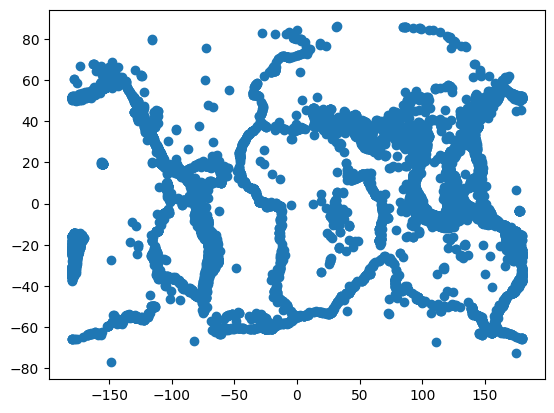

In [15]:
plt.scatter(x=df['Longitude'], y=df['Latitude'],)
plt.show()

<ipython-input-16-50bad3857afe>:4: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



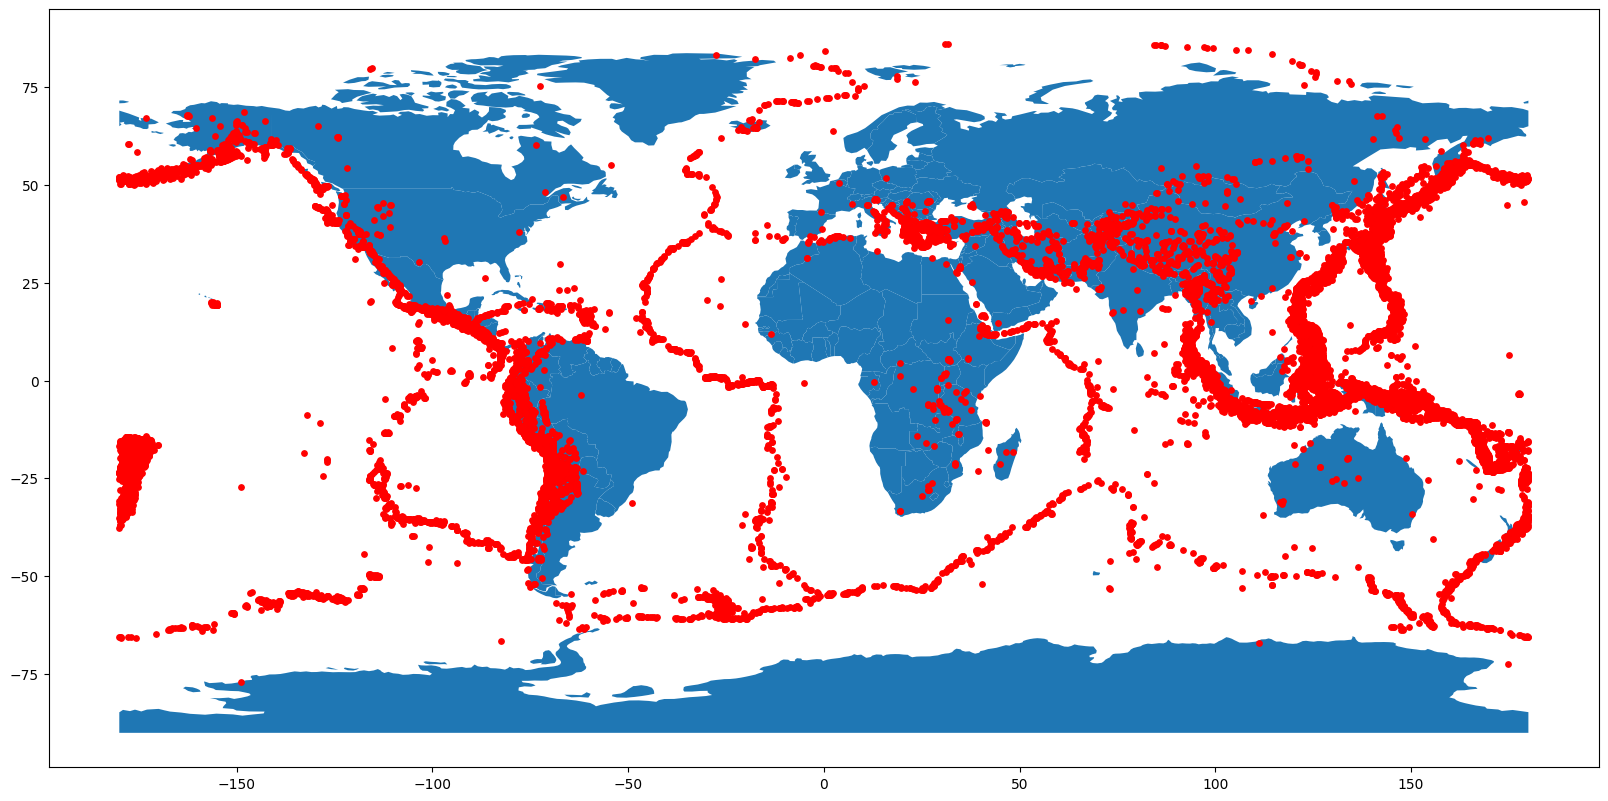

In [16]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 15)), marker='o', color='red', markersize=15);

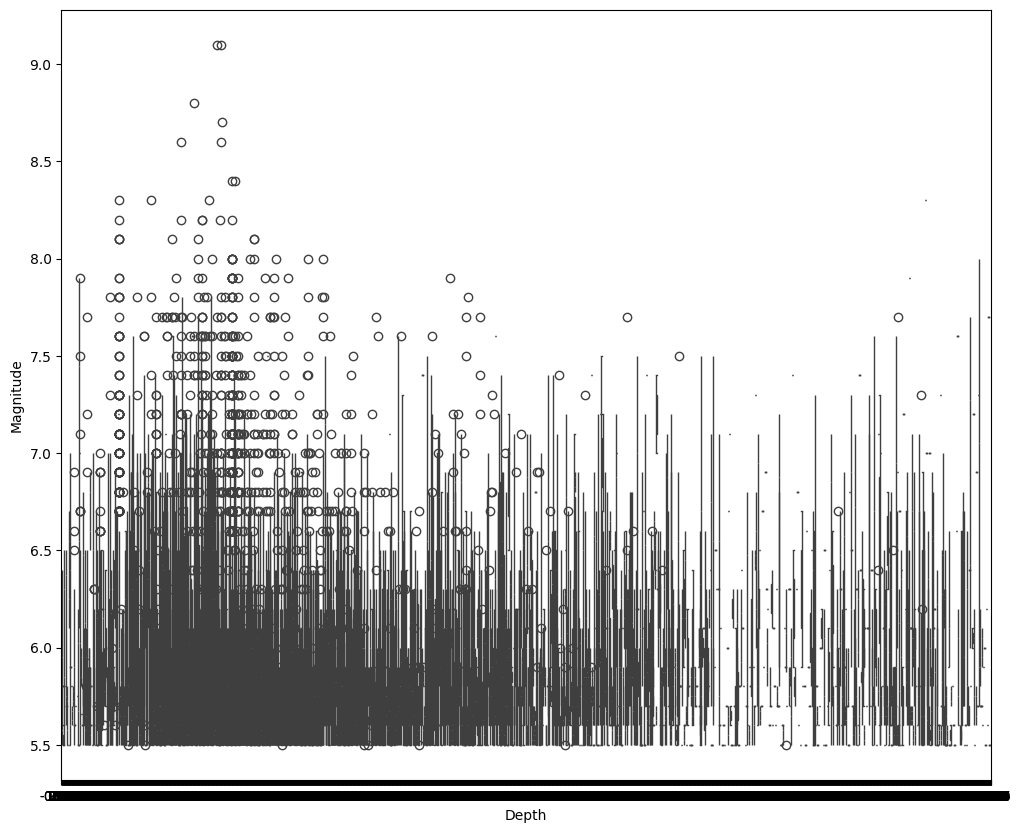

In [17]:
%matplotlib inline
plt.figure(figsize=(12,10))
sns.boxplot(x="Depth", y="Magnitude", data=df)
plt.show();

In [18]:
max_value = df['Depth'].max()
min_value = df['Depth'].min()

print("Maximum value:", max_value)
print("Minimum value:", min_value)

Maximum value: 700.0
Minimum value: -1.1


In [19]:
max_value = df['Magnitude'].max()
min_value = df['Magnitude'].min()

print("Maximum value:", max_value)
print("Minimum value:", min_value)

Maximum value: 9.1
Minimum value: 5.5


In [20]:
# Define a function to remove outliers using Z-scores
def remove_outliers(df, column, threshold=3):
    z_scores = np.abs((df[column] - np.mean(df[column])) / np.std(df[column]))
    outlier_mask = z_scores > threshold
    cleaned_data = df[~outlier_mask]
    return cleaned_data

# Remove outliers from the Magnitude column
cleaned_magnitude = remove_outliers(df, 'Magnitude')

# Remove outliers from the Depth column
cleaned_depth = remove_outliers(df, 'Depth')

print("Cleaned Magnitude:")
print(cleaned_magnitude)

print("\nCleaned Depth:")
print(cleaned_depth)

Cleaned Magnitude:
             Date      Time  Latitude  Longitude        Type   Depth  \
0      01/02/1965  13:44:18   19.2460   145.6160  Earthquake  131.60   
1      01/04/1965  11:29:49    1.8630   127.3520  Earthquake   80.00   
2      01/05/1965  18:05:58  -20.5790  -173.9720  Earthquake   20.00   
3      01/08/1965  18:49:43  -59.0760   -23.5570  Earthquake   15.00   
4      01/09/1965  13:32:50   11.9380   126.4270  Earthquake   15.00   
...           ...       ...       ...        ...         ...     ...   
23407  12/28/2016  08:22:12   38.3917  -118.8941  Earthquake   12.30   
23408  12/28/2016  09:13:47   38.3777  -118.8957  Earthquake    8.80   
23409  12/28/2016  12:38:51   36.9179   140.4262  Earthquake   10.00   
23410  12/29/2016  22:30:19   -9.0283   118.6639  Earthquake   79.00   
23411  12/30/2016  20:08:28   37.3973   141.4103  Earthquake   11.94   

       Magnitude  Magnitude Type            ID  Source Location Source  \
0            6.0               1  ISCGEM86

In [21]:
location = df.loc[df["Location Source"].str.contains("US|ISCGEM|CI|GCMT|NC|GUC|AEIC|UNM")]
display(px.pie(location,names ="Location Source",title = "Percentage of EarthQuakes per Location",hole = .4))
df["Location Source"].value_counts()[:8]

,count
Location Source,
US,20182
ISCGEM,2581
GCMT,56
NC,54
CI,49
GUC,46
AEIC,40
UNM,21


In [22]:
#try to do with year only
fig = px.scatter(df,x = "Date",y = "Magnitude",color = "Type")
fig.show()
df["Magnitude"].value_counts().head(20)

,count
Magnitude,
5.5,4664
5.6,3943
5.7,3064
5.8,2328
5.9,1915
6.0,1558
6.1,1195
6.2,904
6.3,763


In [23]:
df['Location Source'].value_counts()

,count
Location Source,
US,20182
ISCGEM,2581
GCMT,56
NC,54
CI,49
GUC,46
AEIC,40
UNM,21
PGC,19


In [24]:
label_encoder = preprocessing.LabelEncoder()
df['Location Source'] = label_encoder.fit_transform(df['Location Source'])
df['Magnitude Source'] = label_encoder.fit_transform(df['Magnitude Source'])
df['Status'] = label_encoder.fit_transform(df['Status'])
df

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,1,ISCGEM860706,ISCGEM,20,11,0
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,1,ISCGEM860737,ISCGEM,20,11,0
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,1,ISCGEM860762,ISCGEM,20,11,0
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,1,ISCGEM860856,ISCGEM,20,11,0
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,1,ISCGEM860890,ISCGEM,20,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,7,NN00570710,NN,26,14,1
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,7,NN00570744,NN,26,14,1
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,5,US10007NAF,US,44,20,1
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,5,US10007NL0,US,44,20,1


In [25]:
df['Source'].value_counts()

,count
Source,
US,20462
ISCGEM,2460
ISCGEMSUP,120
GCMT,55
NC,51
CI,49
AK,12
OFFICIAL,8
UW,6


In [26]:
df['Source'] = label_encoder.fit_transform(df['Source'])
df

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,1,ISCGEM860706,4,20,11,0
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,1,ISCGEM860737,4,20,11,0
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,1,ISCGEM860762,4,20,11,0
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,1,ISCGEM860856,4,20,11,0
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,1,ISCGEM860890,4,20,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,7,NN00570710,7,26,14,1
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,7,NN00570744,7,26,14,1
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,5,US10007NAF,11,44,20,1
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,5,US10007NL0,11,44,20,1


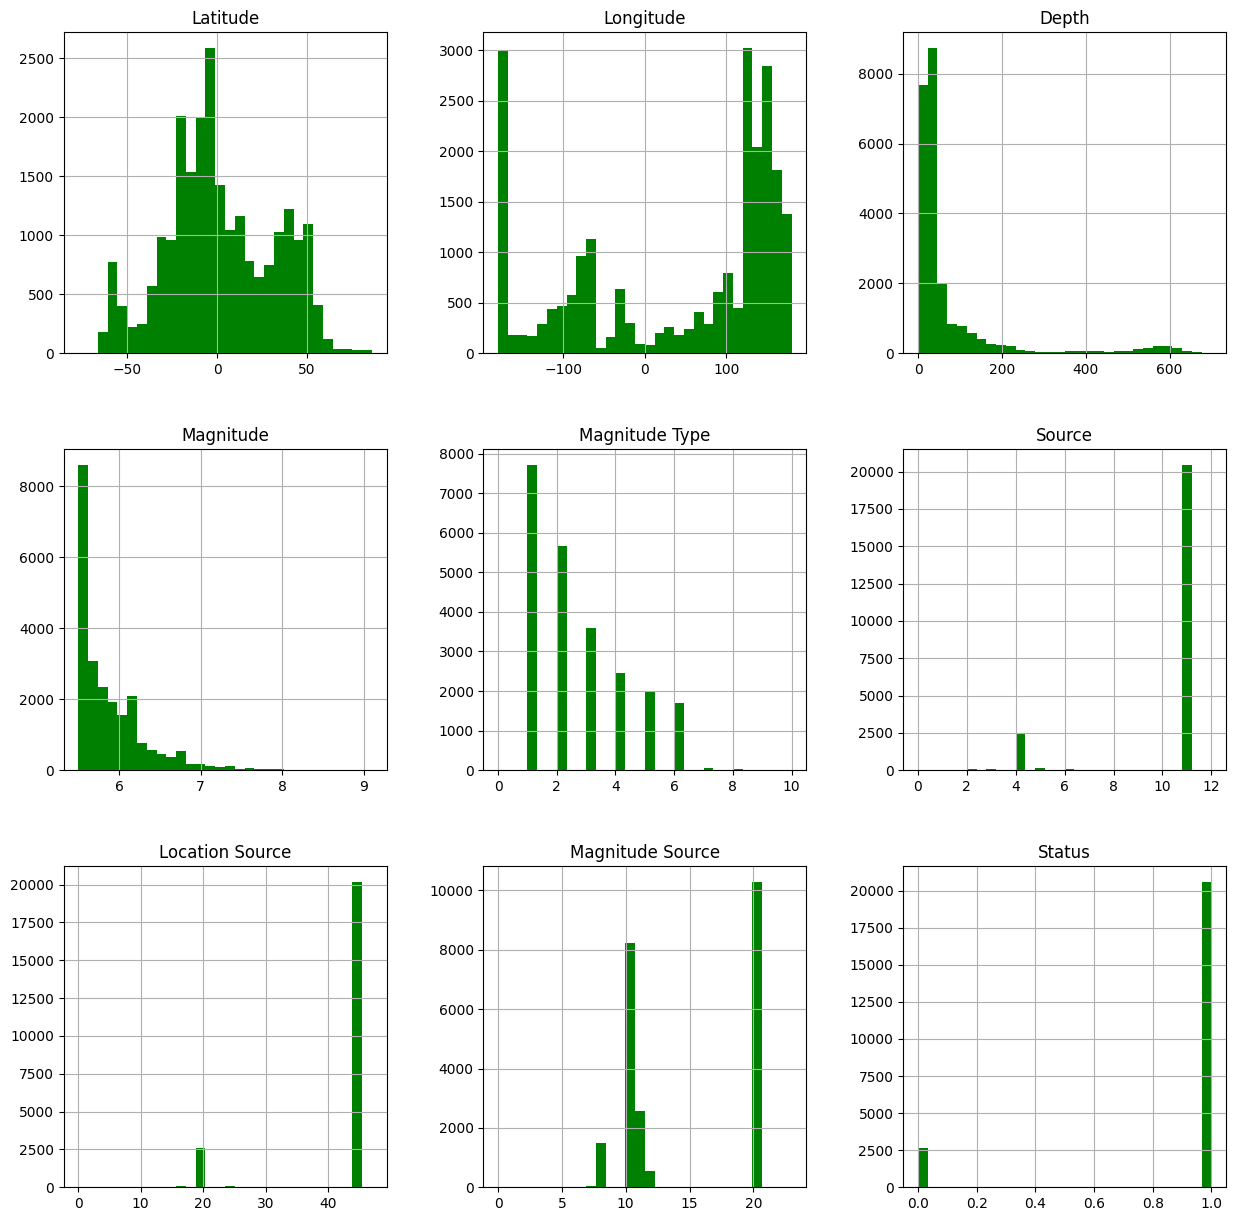

In [27]:
df.hist(bins=30,figsize=(15,15),color='g')
plt.show()

In [28]:
df.drop(columns=['Date', 'Time'],axis=1,inplace=True)

In [29]:
df = df.drop(columns=['Type', 'ID'])
df

,Latitude,Longitude,Depth,Magnitude,Magnitude Type,Source,Location Source,Magnitude Source,Status
0,19.2460,145.6160,131.60,6.0,1,4,20,11,0
1,1.8630,127.3520,80.00,5.8,1,4,20,11,0
2,-20.5790,-173.9720,20.00,6.2,1,4,20,11,0
3,-59.0760,-23.5570,15.00,5.8,1,4,20,11,0
4,11.9380,126.4270,15.00,5.8,1,4,20,11,0
...,...,...,...,...,...,...,...,...,...
23407,38.3917,-118.8941,12.30,5.6,7,7,26,14,1
23408,38.3777,-118.8957,8.80,5.5,7,7,26,14,1
23409,36.9179,140.4262,10.00,5.9,5,11,44,20,1
23410,-9.0283,118.6639,79.00,6.3,5,11,44,20,1


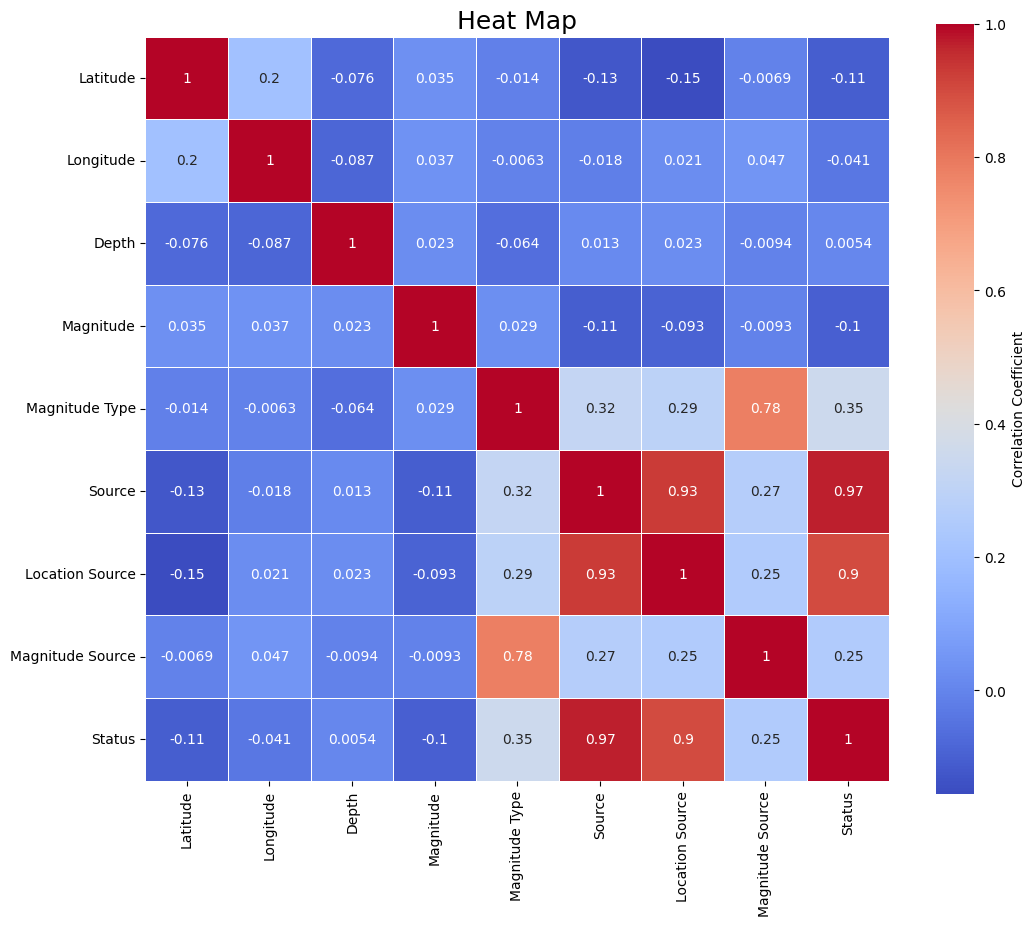

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,linewidths=.5,
            cmap='coolwarm',square=True,cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Heat Map",fontsize=18)
plt.show()

In [31]:
X = df[['Latitude', 'Longitude']]
y = df[['Magnitude', 'Depth']]

In [32]:
X.shape,y.shape

((23232, 2), (23232, 2))

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(18585, 2) (4647, 2) (18585, 2) (4647, 2)


In [34]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

print("Score: ",rf.score(X_test, y_test))

print("Explained variance:", explained_variance_score(y_test, pred_rf))

Score:  0.3432853611541081
Explained variance: 0.343406807144337


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

lm = lg()
lm.fit(X_train, y_train)
pred_lm = lm.predict(X_test)

print("Explained variance:", explained_variance_score(y_test, pred_lm))

Explained variance: 0.006825719084842308


In [37]:
dtc = DecisionTreeRegressor()
dtc.fit(X_train, y_train)
pred_dt = dtc.predict(X_test)
print("using Decision Tree Regression Score",mean_squared_error(y_test,pred_dt))

using Decision Tree Regression Score 1756.5261804306228


In [38]:
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
print("Explained variance:", explained_variance_score(y_test, pred_knn))

Explained variance: 0.39990112217647755


In [39]:
reg.score(X_test, y_test)

NameError: name 'reg' is not defined

In [ ]:
best_fit.score(X_test, y_test)